In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split         
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
df = pd.read_csv("student_scores.csv")


In [5]:
df.head()

,hours_study,attendance,previous_score,final_score
0,2,70,60,65
1,3,60,55,58
2,4,75,65,68
3,5,80,70,75
4,6,85,80,82


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hours_study     20 non-null     int64
 1   attendance      20 non-null     int64
 2   previous_score  20 non-null     int64
 3   final_score     20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes
None


In [7]:
print(df.isnull().sum())

hours_study       0
attendance        0
previous_score    0
final_score       0
dtype: int64


In [8]:
print(df.describe())

       hours_study  attendance  previous_score  final_score
count    20.000000   20.000000       20.000000    20.000000
mean      5.350000   78.650000       74.300000    77.250000
std       2.368099   13.067738       13.553403    13.435519
min       1.000000   50.000000       50.000000    53.000000
25%       3.750000   71.500000       63.750000    67.250000
50%       5.500000   81.000000       77.500000    79.500000
75%       7.000000   88.500000       86.250000    89.250000
max       9.000000   95.000000       91.000000    94.000000


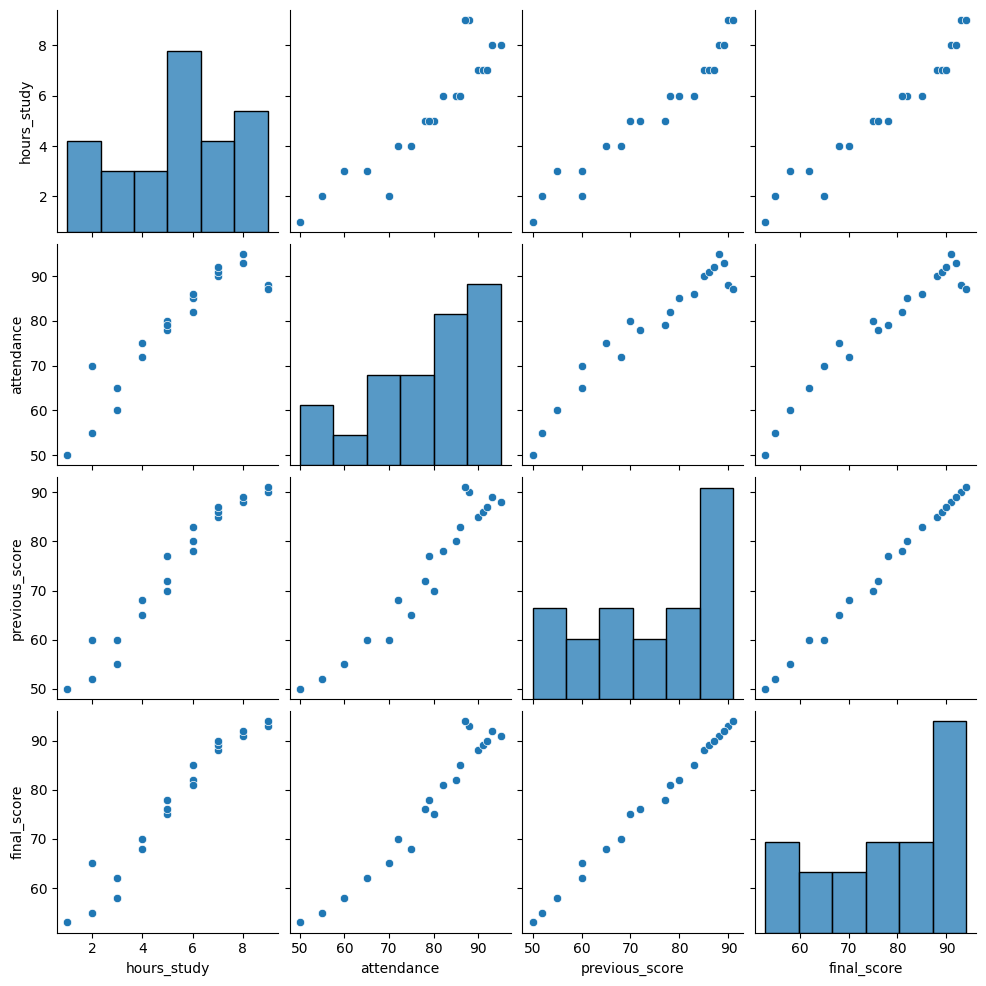

In [9]:
sns.pairplot(df)
plt.show()

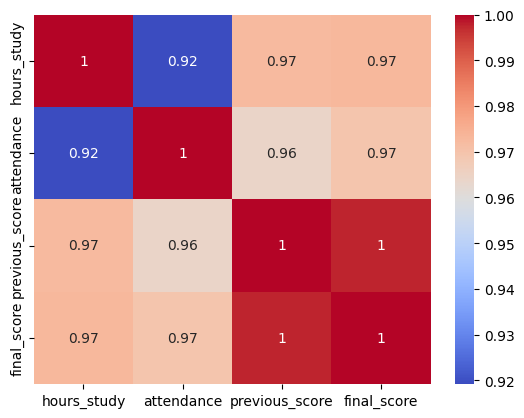

'\nBlue (cool) → negative correlations\n\nRed (warm) → positive correlations\n\nWhite → near zero correlation\n'

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()
'''
Blue (cool) → negative correlations

Red (warm) → positive correlations

White → near zero correlation
'''

# Split Data

In [11]:
X = df[["hours_study","attendance","previous_score"]]
y = df["final_score"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X = df.drop(columns=["final_score"])
y = df["final_score"]

# Model Train

In [13]:
model = LinearRegression()

model.fit(X_train,y_train)
print("Coefficient",model.coef_)
print("Intercept",model.intercept_)

Coefficient [1.07645014 0.12351035 0.6943248 ]
Intercept 10.086494212558705


# Evaluate Model

In [14]:
y_pred = model.predict(X_test)

#Evalution metrices
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print("R2 Square",r2)
print("Rmse",rmse)

R2 Square 0.9917615285920909
Rmse 1.3223522814774853


# Visualize the Model

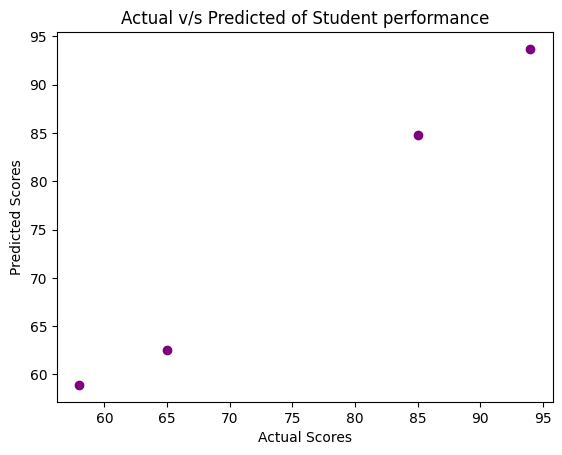

In [15]:
plt.scatter(y_test,y_pred,color='purple')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual v/s Predicted of Student performance")
plt.show()

# Save Model

In [16]:
import joblib
joblib.dump(model,"Student_performance_model.pkl")
print("Model Saved Successfully")

Model Saved Successfully


# Predicted New Data

In [17]:
new_data = pd.DataFrame({
    "hours_study":[10,11,7,8,5,6],
    "attendance":[7,8,5,6,9,5],
    "previous_score":[70,80,78,90,67,85]
})

predicted_score = model.predict(new_data)
print("Predicted Final Score",predicted_score)

Predicted Final Score [70.3183038  78.46151225 72.39653102 81.92838906 63.1000994  76.18035444]
